<a href="https://colab.research.google.com/github/yeji9422/ITB2022/blob/main/1910084_%EA%B9%80%EC%98%88%EC%A7%80_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health.csv")

print(health.info()) 
print(health.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

1. 막대 그래프

In [ ]:
df_health = health.groupby('흡연상태' , as_index = False).agg( 평균HDL콜레스테롤 = ('HDL콜레스테롤', 'mean'))
df_health

,흡연상태,평균HDL콜레스테롤
0,No,58.378296
1,NotNow,53.535611
2,Yes,50.945225


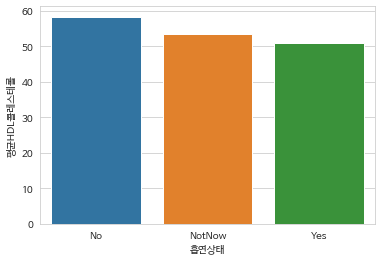

In [ ]:
sns.barplot(data = df_health, x = '흡연상태', y = '평균HDL콜레스테롤')

#인사이트 1. 흡연경력이 없는 사람일수록 HDL콜레스트롤 수치가 높아 혈관에 쌓인 나쁜 콜레스테롤을 더 잘 제거한다.

2. 산점도 

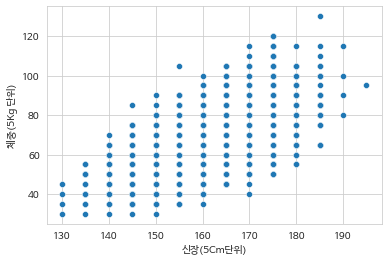

In [ ]:
sns.scatterplot(data = health, x = '신장(5Cm단위)', y = '체중(5Kg 단위)')

#인사이트2. 신장이 클 수록 체중이 무겁다.

3.선 그래프

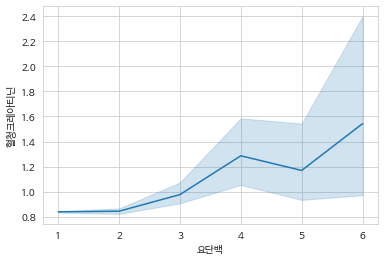

In [ ]:
sns.lineplot(data = health, x = '요단백', y = '혈청크레아티닌')

#인사이트 3. 소변에 단백질이 섞여나오는 비율이 높을수록 혈청크레아티닌 농도가 상승하는 모습을 보인다. 이는 소변에 단백질이 섞여나오는 비율이 높을수록 신장의 기능이 저하된 것을 의미한다.